> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This analysis focuses on patients in Brazil. The main aim is to describe the patients' patterns in showing up to their apointments in an attempt to figure out the factors that may predict whether a patient will show up or not for his appointment.
The main question to be answered by this analysis are whether factors like chronic diseases, scholarships, age, neighbourhood can affect patients showing up for their appointments. In addition, if an SMS is received by the patients, will this help them 
to show up for their appointments.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math 

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [87]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') # loading the dataset 
df.head() # viewing the first 5 rows of the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Dimension of the dataset

In [88]:
df.shape # getting the number of rows and columns in the dataset

(110527, 14)

### Descriptive statistics for numerical columns 

In [89]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Describe function is used only for Age, since it is the only variable that is quantitative. Mean age is 37 and the maximum age is 115 years. However, it seems that age has negative values. 

In [90]:
df.Age.value_counts() # printing the frequencies of values of age

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

a single age value = -1  

This will be replaced by the mean age 

In [92]:
df.Age.replace(-1, int(df.Age.mean()), inplace=True) # replace the negative one with the average age

df.Age.value_counts() # recheck whether the -1 is removed 

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1534
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

### checking for duplicates in the data

In [91]:
df.duplicated().sum()

0

No duplicates are available

### Exploring missing values

In [93]:
df.info()  #listing all variables, number of missing values and types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


For all variables, there are no missing values. Datatypes are appropriate. 

In [94]:
df.isnull().sum()  # to ensure there are no missing values 



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001274B6A0>,
      dtype=object)

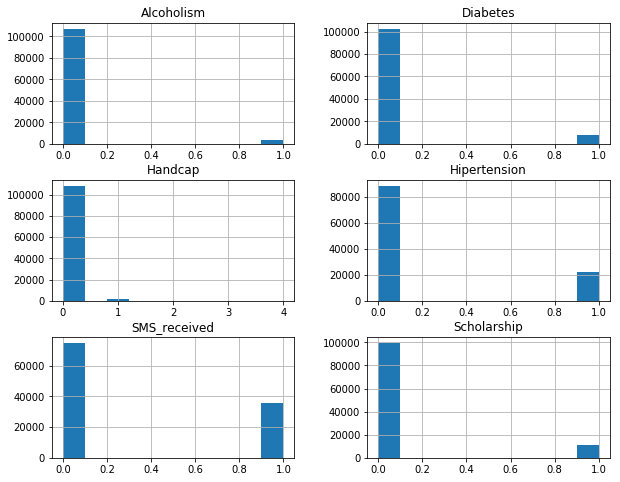

In [95]:
df_hist = df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']] # filtering the columns that
#I will apply histogram on

df_hist.hist(figsize = (10,8))  # plotting the histogram


Although age is the only true quantitative variable, histogram maybe useful to view the distribution of other binary variables as shown above.
The vast majority of patients are not suffering from diabetes, hypertension or alcoholism and they are not handicaped. 



In order to avoid mis-interpretation of the last variable "No-show", I will give it a new name "absent". If 'yes' then the patient was absent for his appointment, meaning that he didn't show up

In [96]:
df.rename(columns={'No-show': 'absent'}, inplace=True)  # rename the column No-show into absent, make the changes inplace


Something is strange with regard to the column Handicap. It should have only two values (0,1). Yet it is having values up till 4. By checking the original data set documentation https://www.kaggle.com/joniarroba/noshowappointments, we found that it should be only True and False.  


In [97]:
df.Handcap.value_counts()  # get the frequencies of values in the handicap column

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

We will assume that wrong values for Handcap doesn't mean that the whole patient record is wrong. Thus, we will remove wrong values of Handcap when we analyze Handcap

## Exploratory Data Analysis

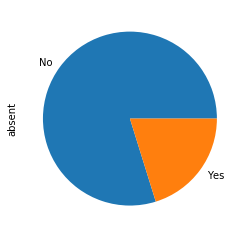

In [98]:
df['absent'].value_counts().plot(kind = 'pie') # plot a pie chart for the frequencies 

<a id='eda'></a>


> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Effect of age on showing to appointments 

In [99]:
df.groupby('absent').mean().Age  # get the average age for each group (show or not show)

absent
No     37.790495
Yes    34.317667
Name: Age, dtype: float64

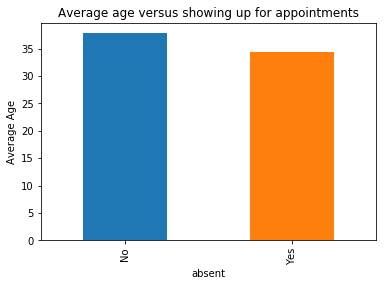

In [100]:
df.groupby('absent').mean().Age.plot.bar() # plot the bar chart

plt.title("Average age versus showing up for appointments")
plt.xlabel("absent")
plt.ylabel("Average Age");

Here we can see the average for those who show and those who don't is quite similar.

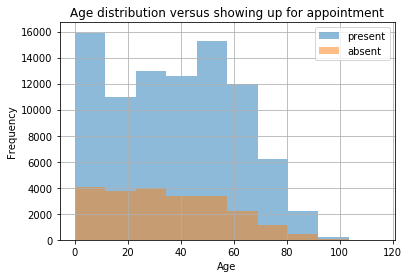

In [101]:
absent = df['absent']== "Yes"   # a new dataframe for those who didn't show up
present = df['absent']== "No"   #  a new dataframe for those who didn't show up

df.Age[present].hist(alpha = 0.5, label = 'present')   # plot histogram for age, modifying the transparency, adding labels
df.Age[absent].hist(alpha = 0.5, label = 'absent')     # plot histogram for age, modifying the transparency, adding labels
plt.legend()   # add legend 
plt.title("Age distribution versus showing up for appointment") # add title 
plt.xlabel("Age")  # add the label for x-axis
plt.ylabel("Frequency");  # add label for y-axis



The right skewness in both histograms is probably due to the right skewness of age itself. Fewer people are elderly in comparison with the population. However, age itself has no aparent effect on patients showing up for appointments. 

# Effect of diseases on showing up for appointments 

### Hypertension

In [102]:
df.groupby('absent').mean().Hipertension  # get average proportion of hypertension in both groups

absent
No     0.204392
Yes    0.169004
Name: Hipertension, dtype: float64

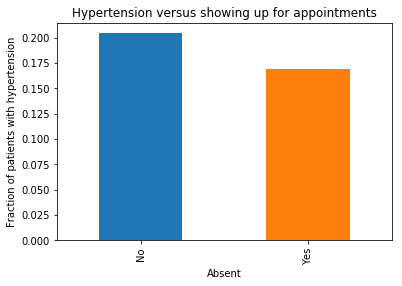

In [103]:
df.groupby('absent').mean().Hipertension.plot.bar()  # plot the bar chart 
plt.title("Hypertension versus showing up for appointments") # title
plt.xlabel("Absent") # x-axis label
plt.ylabel('Fraction of patients with hypertension'); #y-axis label

More patients have hypertension in the group that shows up. However, the difference is quite small.

### Diabetes

In [104]:
df.groupby('absent').mean().Diabetes  # the same for diabetes as hyperntension 

absent
No     0.073837
Yes    0.064071
Name: Diabetes, dtype: float64

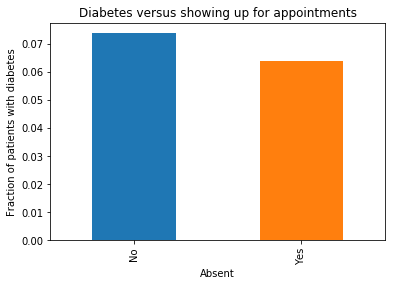

In [105]:
df.groupby('absent').mean().Diabetes.plot.bar()  # again the same
plt.title("Diabetes versus showing up for appointments")
plt.xlabel("Absent")
plt.ylabel('Fraction of patients with diabetes');

It seems again that diabetes is not a very powerful predictor 

### Alcoholism 

In [106]:
df.groupby('absent').mean().Alcoholism   # the same for alcoholism 

absent
No     0.030417
Yes    0.030333
Name: Alcoholism, dtype: float64

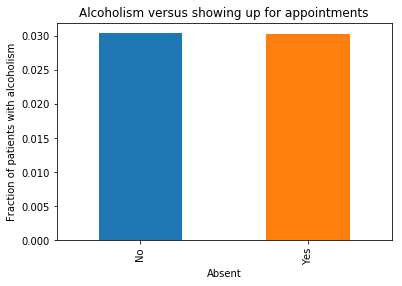

In [107]:
df.groupby('absent').mean().Alcoholism.plot.bar() # again the same
plt.title("Alcoholism versus showing up for appointments")
plt.xlabel("Absent")
plt.ylabel('Fraction of patients with alcoholism');

pretty much similar

# Other factors that may predict showing up

### SMS 

In [108]:

df.groupby('absent').mean().SMS_received  # same for SMS

absent
No     0.291334
Yes    0.438371
Name: SMS_received, dtype: float64

Not receiving SMS is associated with higher rates of patients showing up

In [109]:
pd.crosstab(df.SMS_received, df.absent, margins = True, normalize = 'index')  # get the crosstables of the two variables, 
#include the totals and convert frequencies to proportions 

absent,No,Yes
SMS_received,,
0,0.832967,0.167033
1,0.724255,0.275745
All,0.798067,0.201933


Again this is confirmed by crosstabs. Reference: https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages 

If SMS is received, 72% of patients show up ( not absent)  

If no SMS is received, 83% show up ( not absent)

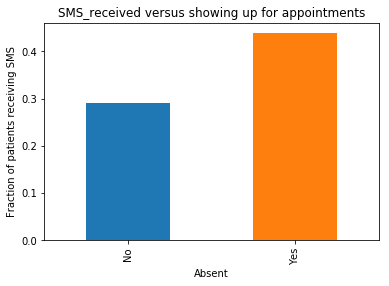

In [110]:
df.groupby('absent').mean().SMS_received.plot.bar()  #plotting bar chart for proportion of SMS received 
plt.title("SMS_received versus showing up for appointments")
plt.xlabel("Absent")
plt.ylabel('Fraction of patients receiving SMS');


### Effect of gender on showing up

In [111]:
pd.crosstab(df.Gender, df.absent, margins = True, normalize = 'index') # crosstables with totals and proportions instead of frequencies


absent,No,Yes
Gender,,
F,0.796854,0.203146
M,0.800321,0.199679
All,0.798067,0.201933


About 80% of males as well as 80% of females show up for appointments.

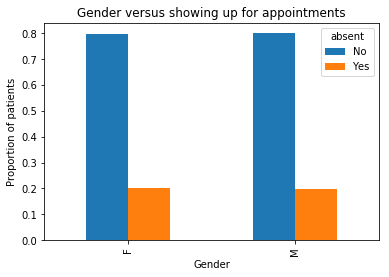

In [112]:
pd.crosstab(df.Gender, df.absent, normalize = 'index').plot.bar() # bar chart plot
plt.title("Gender versus showing up for appointments")
plt.xlabel("Gender")
plt.ylabel('Proportion of patients');

Graphs are quite similar 

### Effect of Neighborhood on showing up

Examining the frequency of encountering different neighbourhoods

In [113]:

df.Neighbourhood.value_counts()   # get the frequencies for all levels in neighbourhood


JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

we will analyze the 5 most common neighbourhoods

In [114]:
dfN = df.query('Neighbourhood in ["JARDIM CAMBURI", "MARIA ORTIZ", "RESISTÊNCIA", "JARDIM DA PENHA", "ITARARÉ"]') # filtering 
#with the 5 most common neighbourhoods

dfN.shape # get numbers of rows and columns 

(25344, 14)

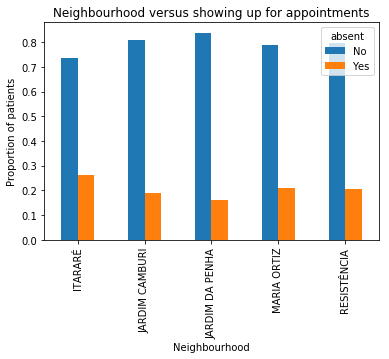

In [115]:
pd.crosstab(dfN.Neighbourhood, df.absent, normalize = 'index').plot.bar() # plotting the crosstables results into bar chart,
# after normalization 
plt.title("Neighbourhood versus showing up for appointments")
plt.xlabel("Neighbourhood")
plt.ylabel('Proportion of patients');

JARDIM DA PENHA is associated with the highest rate of showing up, while ITARARE is associated with the lowest rate. 

### Effect of scholarship on showing up

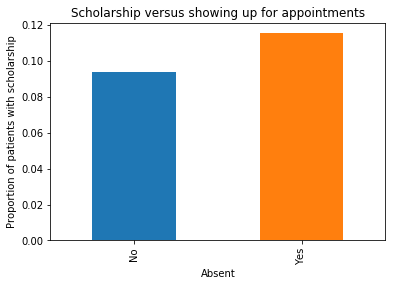

In [116]:
df.groupby('absent').mean().Scholarship.plot.bar()   # plotting proportion of scholarship in each group
plt.title("Scholarship versus showing up for appointments")
plt.xlabel("Absent")
plt.ylabel('Proportion of patients with scholarship');

On average, patients with scholarships show up less than patients with non scholarship.

### Handicap effect on showing up

First we will remove values of Handcap that are not equal to 0,1

In [117]:
df_hand = df.query('Handcap in [0,1]')  # filtering only levels 0,1 in handicap column 
df_hand.shape # getting rows and columns numbers 

(110328, 14)

In [118]:
df_hand.groupby('absent').mean().Handcap # proportion handicapped in each group

absent
No     0.019035
Yes    0.016429
Name: Handcap, dtype: float64

On average, handicapped are less likely to miss their appointments. 

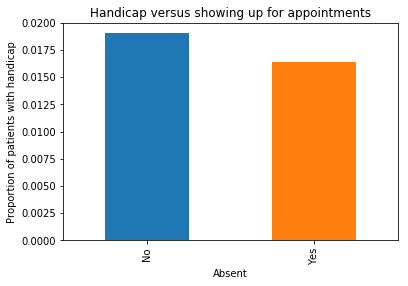

In [119]:
df_hand.groupby('absent').mean().Handcap.plot.bar()  #bar chart plot
plt.title("Handicap versus showing up for appointments")
plt.xlabel("Absent")
plt.ylabel('Proportion of patients with handicap');

<a id='conclusions'></a>
## Conclusions


Several factors have been shown to be associated with patients showing up for their appointments. On average, patients with the following features are more likely to show up for their appointments, in comparison with their counterparts. 
Handicapped, no scholarship, those living in JARDIM DA PENHA, those who don't receive SMS and patients having hypertension or diabetes. Intensity of effect varies. For isntance, effect is somehow big for scholarship factor and seems to be small for diabtes. It is relatively strange that SMS_received is associated with less patients showing up for their appointments. In order to figure which of these factors are independent predictors and not just due to chance, we have to apply proper statistical tests.  

Limitations of the data include some erroneous values in handcap column, other than the expected (0 and 1). There is a single age value that is negative. 

It is worth mentioning that no statistical tests were performed in this analysis. It is descriptive by nature, thus no inference can be drawn from it. In order to have more insights from the data, logistic regression maybe applied, where showing up(the categorical variable) is the dependent variable and all other factors are the independent variables. Univariate logistic regression can be applied first where each variable is enterted all by itself. Next, variables that show statistically significant results maybe entered in the multivariate logsitics regression model to adjust for confounders. 

